# Title:- Medical Insurance Premium Prediction with Machine Learning

#In this project-based course, we will build, train and test a machine learning model to predict insurance cost based on customer features such as age, gender, Body Mass Index (BMI), number of children, smoking habits, and geo-location

# Learning Objectives
Perform data cleaning, feature engineering and visualization

Build, train and test an artificial neural network model in Keras and Tensorflow

Understand the theory and intuition behind artificial neural networks

# Problem Statement.

The Object of this case study is to predict the health insuarance cost incurreed by individuals based on thier age, gender, BMI, numer of children, smoking habit and geo-location.

# Available Features:
-Sex: Insurance contractor gender

-BMI: Body mass index

-Children: Number of children covered by health insuarance

-Smoker: Smoking peoplles

-Region: Residential Area

# Target Feature(Output):
-Charges

# Import all labraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#  Data Ingesction.

In [2]:
df=pd.read_csv(r"F:\Study\Projects- ML\Healthcare\Health_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Engineering

# 1. Check top 5 rows.

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2 Check last 5 rows.

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# 3. Check Shape of Data.

In [6]:
df.shape

(1338, 7)

# 4. Check Null Values in Data.

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

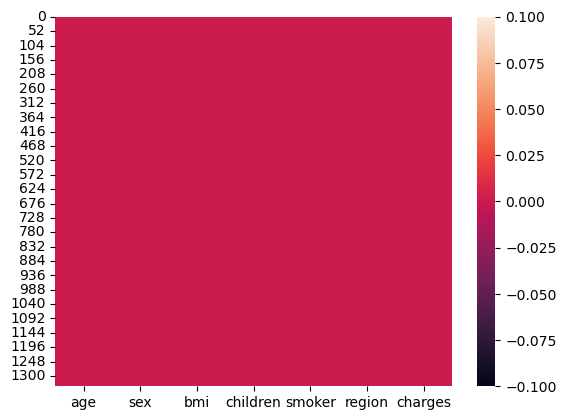

In [8]:
sns.heatmap(df.isnull())

# 5. Mathmetical & Stastical Analysis.

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 6. Check Datatype of each Data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 7. Exploratroy Data Analysis.

c:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

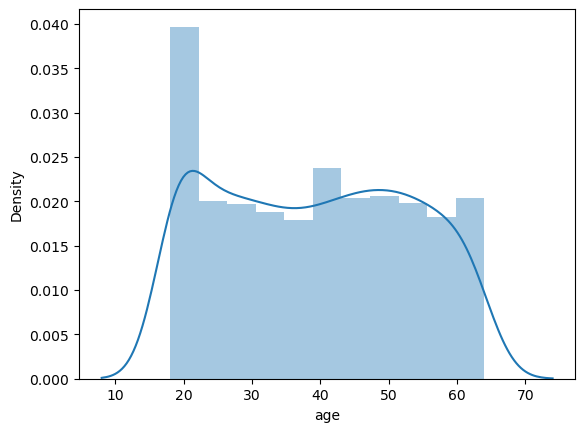

In [11]:
 sns.distplot(df['age'])

***Here, we Analysis base on the age group below 10 and above 70 person are there.***

c:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

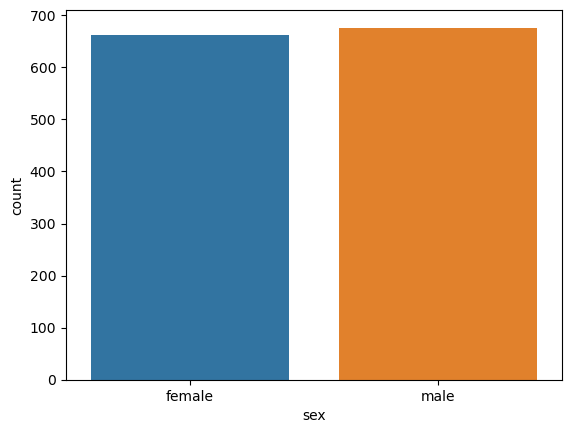

In [12]:
sns.countplot(df['sex'])

***Here, we see that number of female and number of male, male is more than female.***

<AxesSubplot:xlabel='bmi', ylabel='Count'>

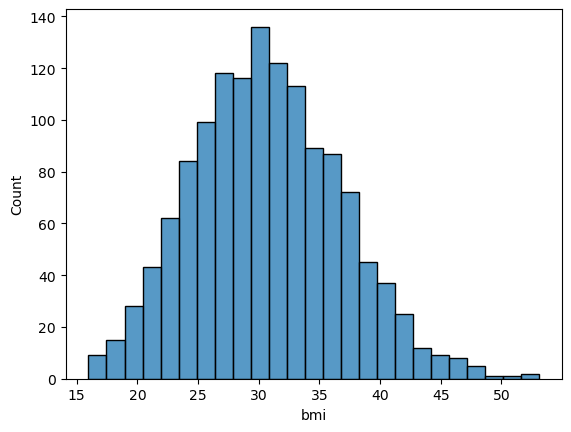

In [13]:
sns.histplot(df['bmi'])

***Here, we analysis the maximum BMI is 50 above and Minimum BMI is near to 15.***

c:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

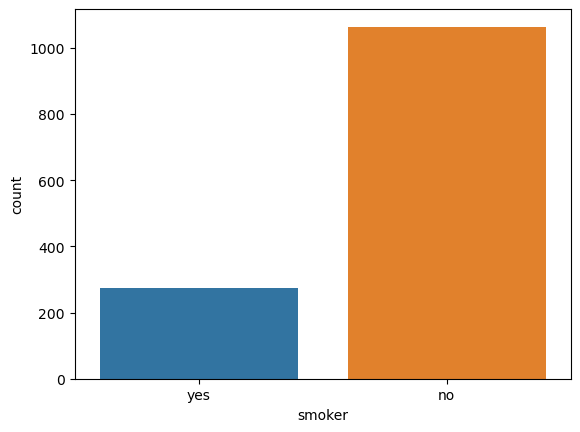

In [14]:
sns.countplot(df['smoker'])

***Here, we Analysis base on Smoker, more than 1000 people are No smoker and almost 250 peoples are Smoker.***

<AxesSubplot:ylabel='Frequency'>

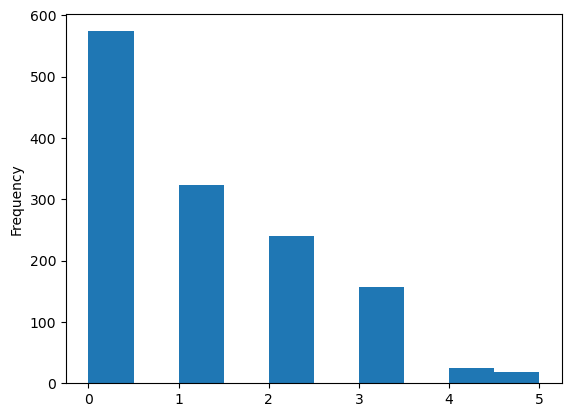

In [15]:
df['children'].plot(kind='hist')

c:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

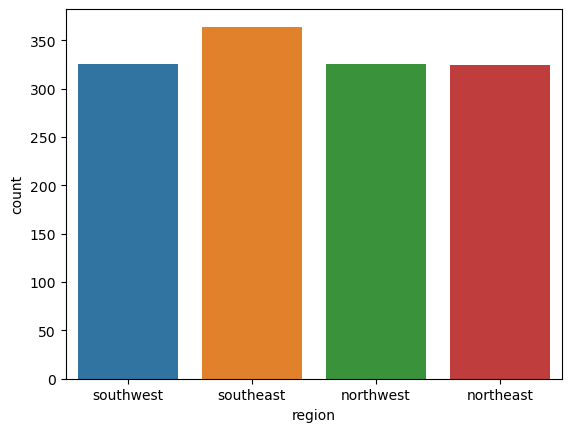

In [25]:
sns.countplot(df['region'])

***Here, we analysis based on region Southeast region is maximum Medical Insuarance Have peoples.***

# 8. Outlier Handle.

<AxesSubplot:>

<Figure size 1600x600 with 0 Axes>

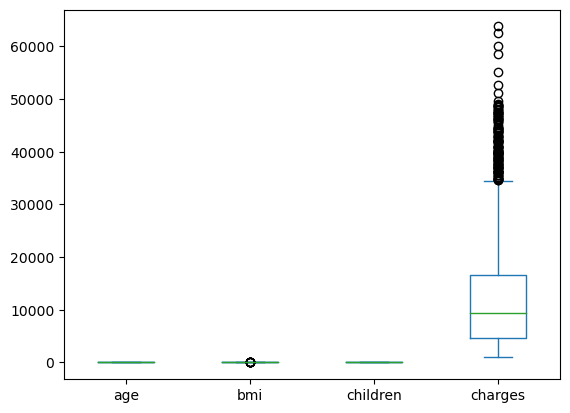

In [16]:
plt.figure(figsize=(16,6))
df.plot(kind='box')

<AxesSubplot:>

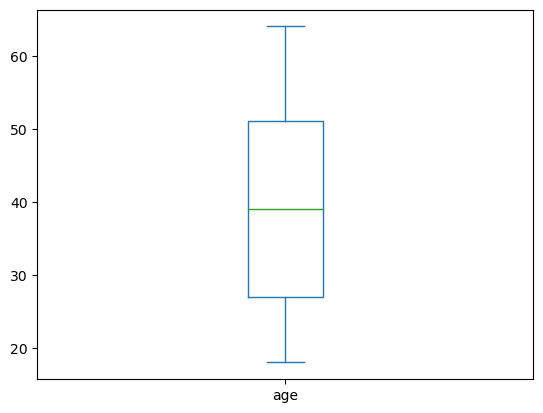

In [17]:
df['age'].plot(kind='box')

<AxesSubplot:>

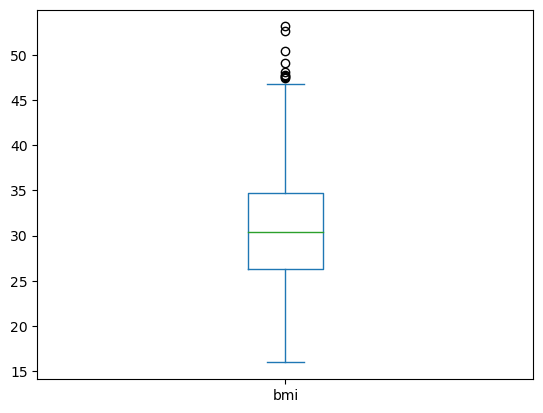

In [18]:
df['bmi'].plot(kind='box')

c:\Users\rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

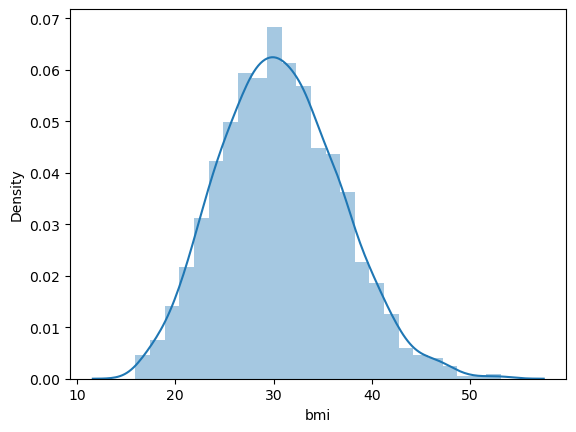

In [19]:
sns.distplot(df['bmi'])

<AxesSubplot:>

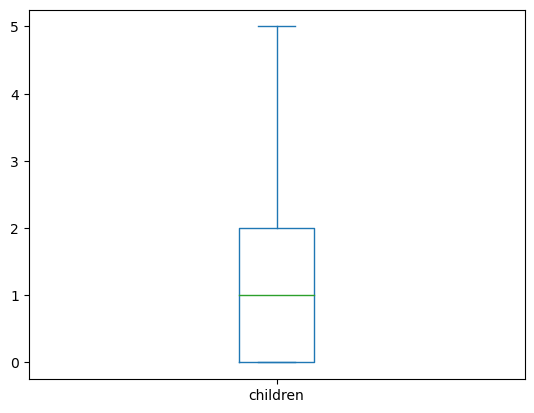

In [20]:
df['children'].plot(kind='box')

# 8. CHeck Unique Values.

In [24]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

# 9. Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
le

LabelEncoder()

In [31]:
Sex=le.fit_transform(df['sex'])

In [32]:
Sex

array([0, 1, 1, ..., 0, 0, 0])

In [34]:
Region=le.fit_transform(df['region'])

In [35]:
Region

array([3, 2, 2, ..., 2, 3, 1])

In [37]:
Smoker=le.fit_transform(df['smoker'])

In [38]:
Smoker

array([1, 0, 0, ..., 0, 0, 1])

# 10. Concat

In [42]:
df['Sex']=Sex

In [44]:
df['Region']=Region

In [45]:
df['Smoker']=Smoker

In [46]:
df

,age,sex,bmi,children,smoker,region,charges,Sex,Region,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,3,1
1,18,male,33.770,1,no,southeast,1725.55230,1,2,0
2,28,male,33.000,3,no,southeast,4449.46200,1,2,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,2,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,3,0


# 11. Drop Columns

In [48]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [49]:
df

,age,bmi,children,charges,Sex,Region,Smoker
0,19,27.900,0,16884.92400,0,3,1
1,18,33.770,1,1725.55230,1,2,0
2,28,33.000,3,4449.46200,1,2,0
3,33,22.705,0,21984.47061,1,1,0
4,32,28.880,0,3866.85520,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,2,0
1336,21,25.800,0,2007.94500,0,3,0


# 12. Spliting Data

In [52]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'Sex', 'Region', 'Smoker'], dtype='object')

In [59]:
X=df[['age','bmi','children','Sex','Region','Smoker']]

In [60]:
X

,age,bmi,children,Sex,Region,Smoker
0,19,27.900,0,0,3,1
1,18,33.770,1,1,2,0
2,28,33.000,3,1,2,0
3,33,22.705,0,1,1,0
4,32,28.880,0,1,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,1,1,0
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,2,0
1336,21,25.800,0,0,3,0


In [61]:
y=df[['charges']]

In [62]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# 13. Feature Scalling

In [65]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler_X = StandardScaler()

In [70]:
scaler_X

StandardScaler()

In [72]:
X_Scale=scaler_X.fit_transform(X)

In [76]:
X_Scale

array([[-1.43876426, -0.45332   , -0.90861367, -1.0105187 ,  1.34390459,
         1.97058663],
       [-1.50996545,  0.5096211 , -0.07876719,  0.98959079,  0.43849455,
        -0.5074631 ],
       [-0.79795355,  0.38330685,  1.58092576,  0.98959079,  0.43849455,
        -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -1.0105187 ,  0.43849455,
        -0.5074631 ],
       [-1.29636188, -0.79781341, -0.90861367, -1.0105187 ,  1.34390459,
        -0.5074631 ],
       [ 1.55168573, -0.26138796, -0.90861367, -1.0105187 , -0.46691549,
         1.97058663]])

In [73]:
scaler_y=StandardScaler()

In [74]:
y_scale=scaler_y.fit_transform(y)

In [75]:
y_scale

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

# 14. Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# Splitting the data into training set (80%) and test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 15. Model Training

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [84]:
model=LinearRegression()

In [85]:
model

LinearRegression()

In [87]:
model.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred=model.predict(X_test)

In [89]:
y_pred

array([[ 8924.40724442],
       [ 7116.29501758],
       [36909.01352144],
       [ 9507.87469118],
       [27013.3500079 ],
       [10790.77956153],
       [  226.29844571],
       [16942.71599941],
       [ 1056.63079407],
       [11267.91997309],
       [28048.59793155],
       [ 9424.36324087],
       [ 5326.32232088],
       [38460.06017922],
       [40303.40597026],
       [37147.01010262],
       [15287.91876684],
       [35965.05485917],
       [ 9179.1753067 ],
       [31510.8319849 ],
       [ 3797.79068365],
       [10070.82803304],
       [ 2312.57551348],
       [ 7074.41348194],
       [11352.37224357],
       [12907.77079523],
       [14448.84678727],
       [ 6205.65997921],
       [ 9917.00839638],
       [ 2239.50032819],
       [ 9060.55469043],
       [13120.56214535],
       [ 4617.70702822],
       [ 3467.91218926],
       [ 4402.74821855],
       [12967.91608907],
       [ 1927.44498944],
       [ 8757.9180081 ],
       [33324.35180597],
       [32638.47697026],


In [102]:
r_squered=r2_score(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))


In [103]:
print("R-Squared:",r_squered)
print("MSE:",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)

R-Squared: 0.7833463107364538
MSE: 33635210.43117842
MAE: 4186.5088983664355
RMSE: 5799.587091438357


# Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)

In [107]:
rf_model

RandomForestRegressor(random_state=42)

In [108]:
rf_model.fit(X_train,y_train)

C:\Users\rohit\AppData\Local\Temp\ipykernel_9920\764246711.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [110]:
rf_pred=rf_model.predict(X_test)

In [111]:
rf_pred

array([11116.4154523 ,  5279.3315315 , 28261.1135955 , 10712.5176533 ,
       34526.7010364 ,  9133.2200995 ,  2103.4712695 , 14442.4762686 ,
        6238.2962931 , 10661.6299997 , 20239.5297858 ,  7386.1976978 ,
        4894.364618  , 46496.3565675 , 48415.4409348 , 45504.3021979 ,
        9925.6052816 , 43438.8103479 ,  9047.2776489 , 24237.7887065 ,
        6187.8446445 , 10763.3418747 ,  2282.8260166 ,  2711.6813281 ,
       12010.4130091 , 12186.2529167 , 13297.2574337 ,  6933.1372034 ,
       10379.2773781 ,  5050.91832532,  7689.3889535 , 11742.2911635 ,
        2515.1934231 ,  5445.6901702 ,  3190.1848717 , 10587.6009703 ,
        2673.5591105 ,  8191.9397535 , 23489.310718  , 39321.461817  ,
        6489.3096034 ,  2746.9478863 , 11998.2359501 , 14477.737967  ,
        5821.3102169 , 15349.9449983 , 15116.0722669 ,  5903.5897884 ,
       42330.6993162 ,  7200.0425201 , 13889.2426335 ,  2171.0700651 ,
        6805.0877189 ,  1830.2206289 , 12272.9471291 , 11834.6874174 ,
      

In [112]:
 r_squered=r2_score(y_test,rf_pred)
MSE=mean_squared_error(y_test,rf_pred)
MAE=mean_absolute_error(y_test,rf_pred)
RMSE=np.sqrt(mean_squared_error(y_test,rf_pred))

In [113]:
print("R-Squared:",r_squered)
print("MSE:",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)

R-Squared: 0.8642467853183886
MSE: 21075514.37525057
MAE: 2534.1740964157034
RMSE: 4590.807595102475
